In [1]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Advertising.csv")
df.head()
# select file to upload

Saving Advertising.csv to Advertising.csv


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
# list nil values
df.isnull().values.any()
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
# pritn first 5 entries
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
drop_list = ["Unnamed: 0"]

df = df.drop(drop_list, axis=1)

df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

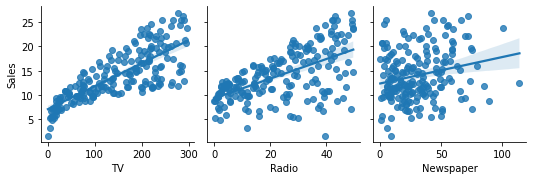

In [ ]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb235c9cbd0>,
      dtype=object)

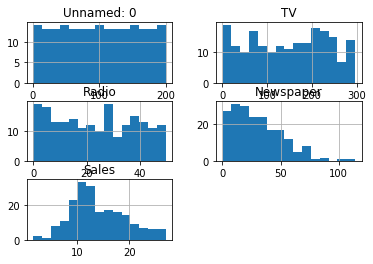

In [4]:
# number of bars in histogram 
df.hist(bins=15)

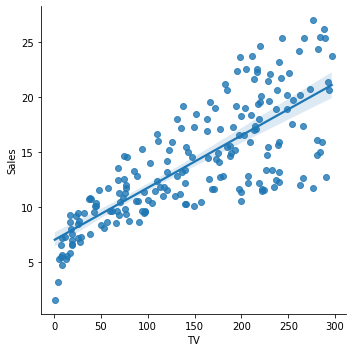

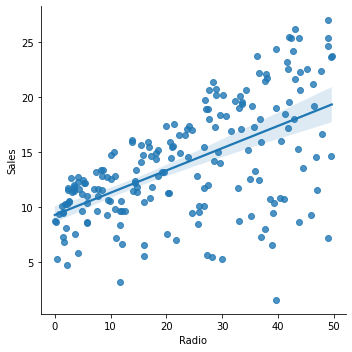

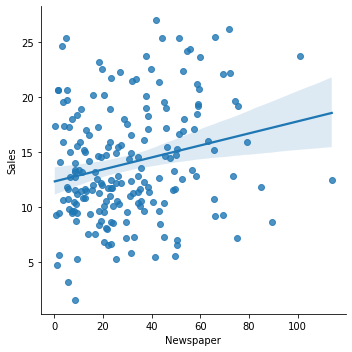

In [9]:
sns.lmplot('TV','Sales',data=df)
sns.lmplot('Radio','Sales',data=df)
sns.lmplot('Newspaper','Sales',data=df)

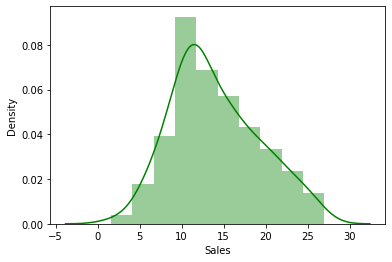

In [ ]:
sns.distplot(df.Sales,bins=10,color="green",hist=True)

In [10]:
num_cols = df[["TV","Radio","Newspaper"]]
a = df.corr()['Sales'].sort_values(ascending=False)
print(a)

Sales         1.000000
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Unnamed: 0   -0.051616
Name: Sales, dtype: float64


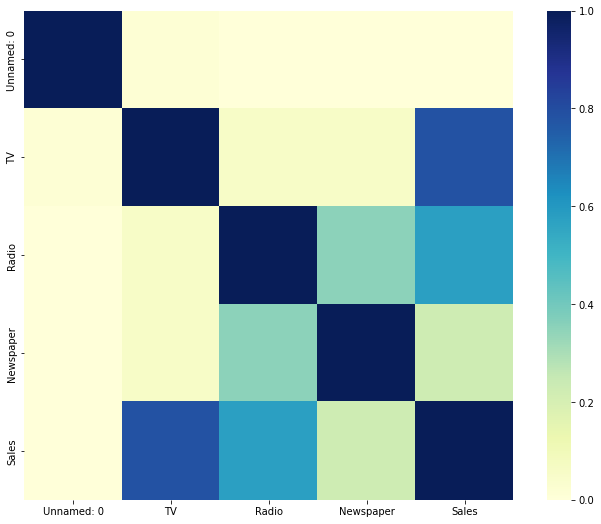

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()

In [13]:
X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


model = [('LinearRegression', LinearRegression(X_train, y_train))]
lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper",data=df).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

print(X_train)

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.58e-96
Time:                        12:24:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [48]:
class LinearRegression():
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
        self.B = 0
        self.c = 0
    
    def get_mean(self):
        return np.mean(self.X),np.mean(self.Y)

    def fit(self):
        numerator, denominator = 0,0
        x_mean,y_mean = self.get_mean()
        
        for i in range(len(self.X)):
            a = ((self.X[i])-(x_mean))
            b = ((self.Y[i])-(y_mean))
            numerator += (a*b)
            denominator += a**2
        self.B = numerator/denominator
        self.c = y_mean - (self.B*x_mean)
    
    def predict(self,xtest,ytest):
        plt.scatter(xtest,ytest,color = 'red')
        plt.plot(xtest,(self.B*xtest)+self.c,color = 'green')
        plt.show()
    
    def plot(self):
        plt.scatter(self.X,self.Y,color = 'red')
        plt.plot(self.X,(self.B*self.X)+self.c,color = 'green')
        plt.show()
        
    def calculate_accuracy(self,x,y):
        x_mean,y_mean = self.get_mean()
        ss_t = 0
        ss_r = 0
        for i in range(len(x)):
            y_pred = (self.B*x[i]) + self.c
            ss_t += (y[i] - y_mean) ** 2
            ss_r += (y[i] - y_pred) ** 2
        r2 = 1 - (ss_r/ss_t)
        return r2

model = LinearRegression(X_train,y_train)
print(np.mean(X_train))
#model.fit()

Unnamed: 0    103.437500
TV            147.190625
Radio          24.028125
Newspaper      30.629375
dtype: float64
